1. Importing libraries and reading data
2. Data inspection
3. Data preprocessing
4. Model building
5. Model training and Testing Data
6. Checking residuals and r2_score and adjusted r2_score

1. **Importing Libraries**

In [147]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [148]:
# reading data adn seeing the shape of data - 150 rows and 7 columns
df = pd.read_csv("Fish.csv")
df1 = df
print(df.shape)

(159, 7)


2. **Data Inspection**

In [149]:
# what are the columns we have

print(df.columns)

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')


In [150]:
# checking the no of missing values we have

df.isnull().sum() / df.shape[0] *100

Species    0.0
Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64



* **There are no missing values in the dataset**

In [151]:
categories = df.select_dtypes(include = ([np.object]))
numerical = df.select_dtypes(include = ([np.int64, np.float64]))

print("Categorical Feature:",categories.shape[1])
print("Numerical Feature:",numerical.shape[1])



Categorical Feature: 1
Numerical Feature: 6


C:\Users\barsh\AppData\Local\Temp/ipykernel_4576/2419495235.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categories = df.select_dtypes(include = ([np.object]))


3. **Data Cleaning**

In [152]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [154]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

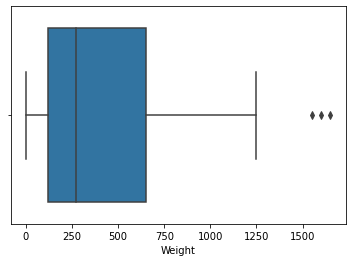

In [155]:
sns.boxplot('Weight', data = df)

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

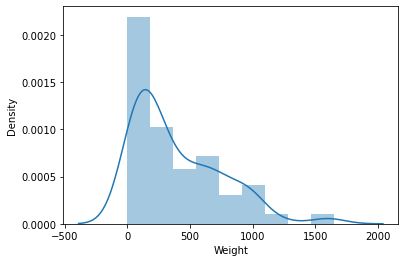

In [156]:
sns.distplot(df['Weight'])

Weight of the fish has some outliers which is not good for our model. Outliers needs to be handles. We will treat it in EDA part.

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length1'>

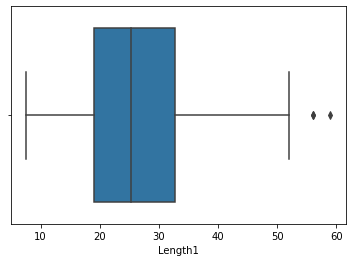

In [157]:
sns.boxplot("Length1", data = df)

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length1', ylabel='Density'>

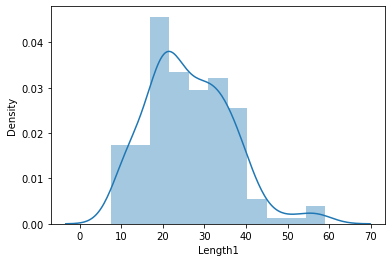

In [158]:
sns.distplot(df['Length1'])

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length2'>

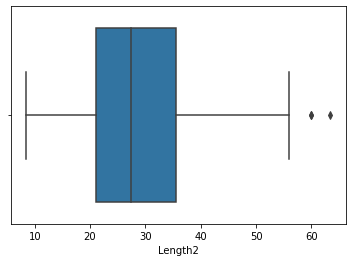

In [159]:
sns.boxplot("Length2", data = df)

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length2', ylabel='Density'>

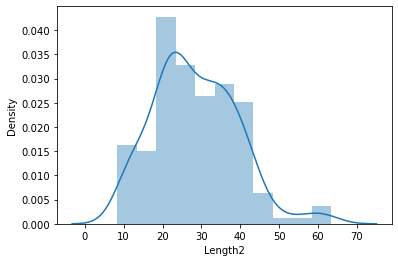

In [160]:
sns.distplot(df["Length2"])

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length3'>

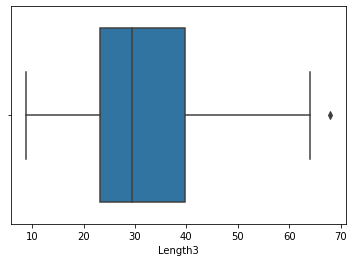

In [161]:
sns.boxplot("Length3", data = df)

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length3', ylabel='Density'>

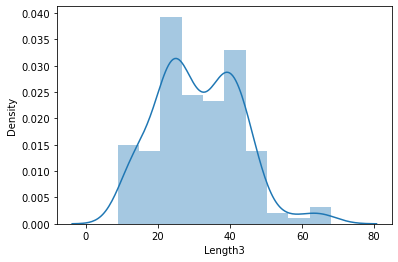

In [162]:
sns.distplot(df["Length3"])

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

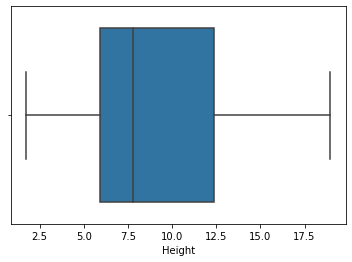

In [163]:
sns.boxplot("Height", data = df)

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

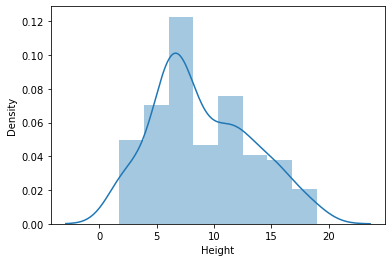

In [164]:
sns.distplot(df["Height"])

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Width'>

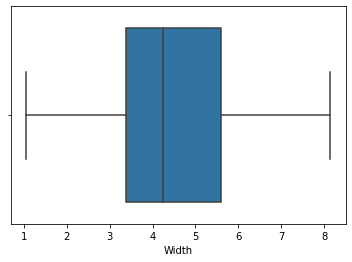

In [165]:
sns.boxplot("Width", data =df)

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Width', ylabel='Density'>

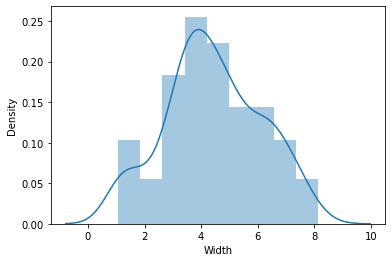

In [166]:
sns.distplot(df["Width"])



* **weight,Length1, Length2, Length3 all have outliers on the upper end so they need to be treated**


* **Height and width have no outliers**











3a. **Treating Outliers**

In [167]:
# weight column - using IQR method to treat outliers since weight column is skewed

IQR = df["Weight"].quantile(0.75) - df["Weight"].quantile(0.25)
print(IQR)

530.0


In [168]:
lower_bridge = df["Weight"].quantile(0.25) - IQR*1.5
upper_bridge = df["Weight"].quantile(0.75) + IQR*1.5

print(lower_bridge)
print(upper_bridge)

-675.0
1445.0


In [169]:
#which rows have higher than the upper bridge value
df[(df["Weight"] < lower_bridge) | (df["Weight"] > upper_bridge)]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


Since i dont have outlier on the lower bridge, evrything is above the upper bridge so we are going to cap it with the upper bridge value

In [170]:
# capping
df["Weight"] = np.where(df["Weight"] > upper_bridge, upper_bridge, df['Weight'])

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

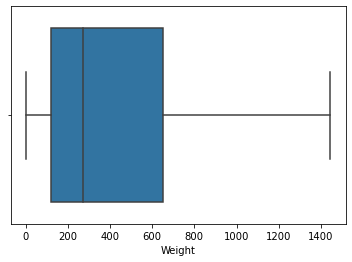

In [171]:
sns.boxplot("Weight", data = df)

#outliers handled !

In [172]:
# for length1

iqr_length1 = df["Length1"].quantile(0.75) - df["Length1"].quantile(0.25)
l = df["Length1"].quantile(0.25) - 1.5 * iqr_length1
u = df["Length1"].quantile(0.75) + 1.5 * iqr_length1



In [173]:
df["Length1"] = np.where(df["Length1"] > u, u, df["Length1"])


C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length1'>

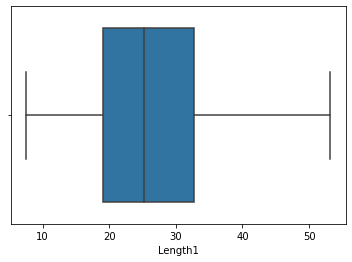

In [174]:
sns.boxplot("Length1", data = df)

In [175]:
#for length2
iqr_length2 = df["Length2"].quantile(0.75) - df["Length2"].quantile(0.25)
l2 = df["Length2"].quantile(0.25) - 1.5 * iqr_length2
u2 = df["Length2"].quantile(0.75) + 1.5 * iqr_length2
df["Length2"] = np.where(df["Length2"] > u2, u2, df["Length2"])


C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length2'>

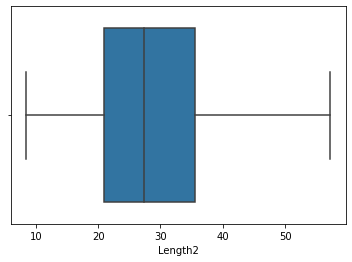

In [176]:
sns.boxplot("Length2", data = df)

In [177]:
#for length3
iqr_length3 = df["Length3"].quantile(0.75) - df["Length3"].quantile(0.25)
l3 = df["Length3"].quantile(0.25) - 1.5 * iqr_length3
u3 = df["Length3"].quantile(0.75) + 1.5 * iqr_length3
df["Length3"] = np.where(df["Length3"] > u3, u3, df["Length3"])


C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length3'>

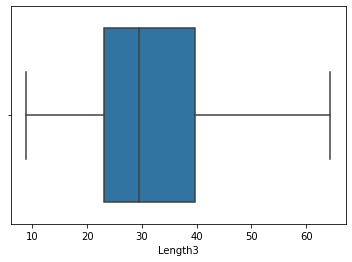

In [178]:
sns.boxplot("Length3", data = df)

Outlier in these 4 columns are handled.

3b. **High-Correlatiion,Multicollinearity**

<AxesSubplot:xlabel='Length1', ylabel='Weight'>

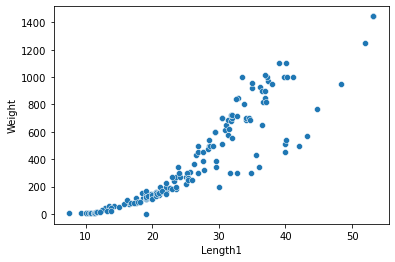

In [179]:
# checking how weight and lenth1 is related

sns.scatterplot(x = df["Length1"], y = df["Weight"])


<AxesSubplot:xlabel='Length2', ylabel='Weight'>

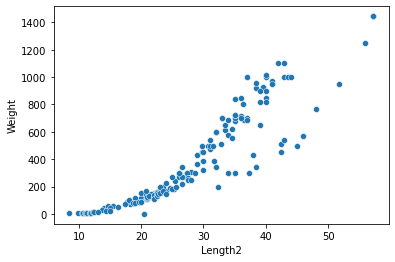

In [180]:
# checking how weight and length 2 are related- both of them are sort of linear

sns.scatterplot(x = df["Length2"], y = df["Weight"])


<AxesSubplot:xlabel='Length3', ylabel='Weight'>

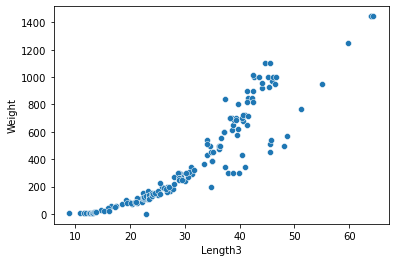

In [181]:
# similarly for length3 as well
sns.scatterplot(x = df["Length3"], y = df["Weight"])


In [182]:
# since the distributions of lengtha dn the weight are almost similar, 
#i have a strong feeling that they might have a very strong correlation 
# among the independent features-might lead to multicollinearity problem
# Lets see:

df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.911859,0.915150,0.922441,0.741635,0.898874
Length1,0.911859,1.000000,0.999503,0.991943,0.636902,0.875426
Length2,0.915150,0.999503,1.000000,0.993990,0.651566,0.881426
Length3,0.922441,0.991943,0.993990,1.000000,0.706758,0.880175
Height,0.741635,0.636902,0.651566,0.706758,1.000000,0.792881
Width,0.898874,0.875426,0.881426,0.880175,0.792881,1.000000


Basically all the length variables have almost same effect on weight as you can see in the dataframe here. Also length1, length2, length3 are highly correlated among them which causes the problem of multicollinearity here and thus they dont add any additional information or unique information to the model so we will drop both length1 and length2 and keep length3 in our data.

In [183]:
# dropping the redundant columns

df.drop(columns = ["Length1","Length2"], inplace= True)

In [184]:
df.head()

,Species,Weight,Length3,Height,Width
0,Bream,242.0,30.0,11.5200,4.0200
1,Bream,290.0,31.2,12.4800,4.3056
2,Bream,340.0,31.1,12.3778,4.6961
3,Bream,363.0,33.5,12.7300,4.4555
4,Bream,430.0,34.0,12.4440,5.1340


<AxesSubplot:xlabel='Height', ylabel='Weight'>

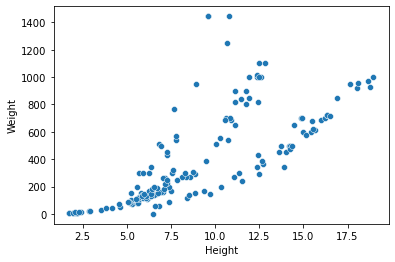

In [185]:
sns.scatterplot(x = df["Height"], y = df["Weight"])

<AxesSubplot:xlabel='Width', ylabel='Weight'>

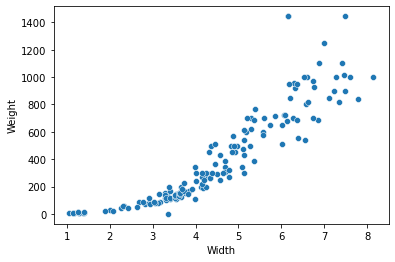

In [186]:
sns.scatterplot(x = df["Width"], y = df["Weight"])

All the variables are sort of linear dependecy with the target feature. Hence we can use regression models for the same

In [187]:
df.corr()

,Weight,Length3,Height,Width
Weight,1.000000,0.922441,0.741635,0.898874
Length3,0.922441,1.000000,0.706758,0.880175
Height,0.741635,0.706758,1.000000,0.792881
Width,0.898874,0.880175,0.792881,1.000000


Height and width have a decent correlation among them basically its below 90% so not much of a headache.

3c. **Transformation to normal distribution**

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


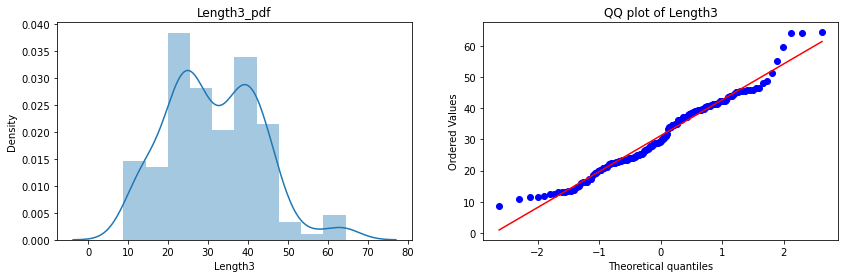

In [188]:
#lets plot a distribution plot and a qq plot to see how much our varibales
# are deviating from a normal distribution and which of them needs transformation

plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(df["Length3"])
plt.title("Length3_pdf")

plt.subplot(122)
stats.probplot(df["Length3"], dist = "norm", plot = plt)
plt.title("QQ plot of Length3")
plt.show()

Length3 column is almost normally distributed more or less.Most of the times the points are on the line in qq plot except for some.

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


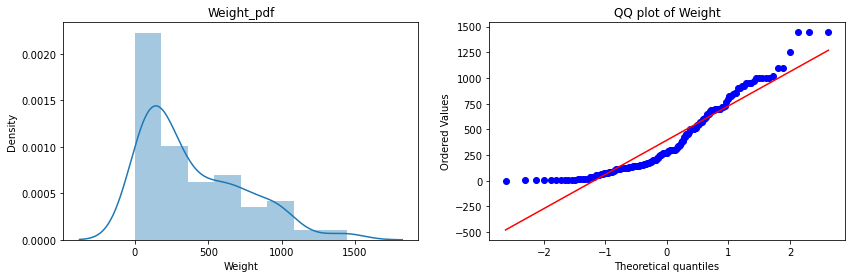

In [189]:
# for weight

plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(df["Weight"])
plt.title("Weight_pdf")

plt.subplot(122)
stats.probplot(df["Weight"], dist = "norm", plot = plt)
plt.title("QQ plot of Weight")
plt.show()

The distribution itself is skewed as you can see. and in the qq plot as well most of the time the points are away from the line. Hence weight column needs transformation

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


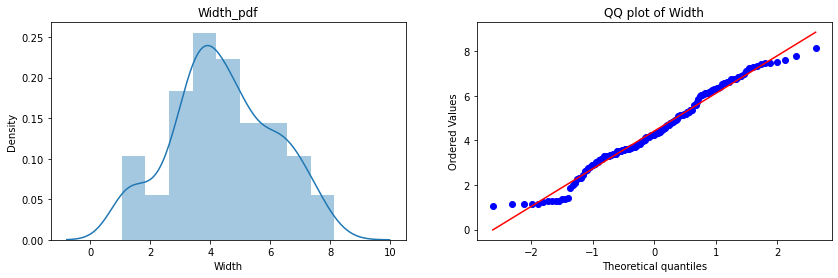

In [190]:
# for width

plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(df["Width"])
plt.title("Width_pdf")

plt.subplot(122)
stats.probplot(df["Width"], dist = "norm", plot = plt)
plt.title("QQ plot of Width")
plt.show()

For the width column, its almost close to normal distribution and I wud go with not applying a transformation here

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


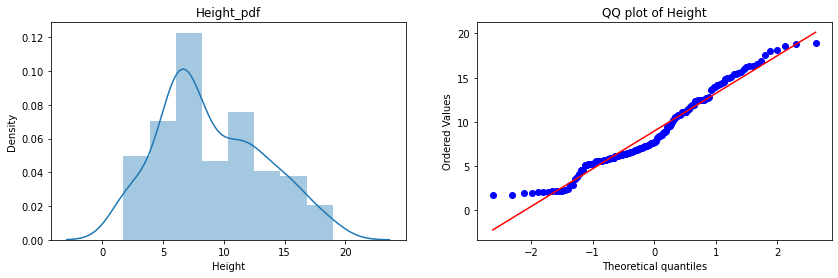

In [191]:
# for height

plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(df["Height"])
plt.title("Height_pdf")

plt.subplot(122)
stats.probplot(df["Height"], dist = "norm", plot = plt)
plt.title("QQ plot of Height")
plt.show()

So except my target variable all the other variables length,height and width are showing almost normal distribution with a good qq plot. So i guess it will work for us for our model

4. **Model Building**

In [192]:
# splitting the data into dependent and independent varibales
X = df[["Species","Length3","Height","Width"]]
y = df["Weight"]

In [193]:
X.shape

(159, 4)

In [194]:
y.shape

(159,)

In [195]:
X.head()

,Species,Length3,Height,Width
0,Bream,30.0,11.5200,4.0200
1,Bream,31.2,12.4800,4.3056
2,Bream,31.1,12.3778,4.6961
3,Bream,33.5,12.7300,4.4555
4,Bream,34.0,12.4440,5.1340


In [196]:
# transforming the weight column- i applied log1p,log2,square and sqrt transformation and among them
# sqrt transformation looked better and close to normal distribution to me

y = np.sqrt(y)

C:\ProgramData\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


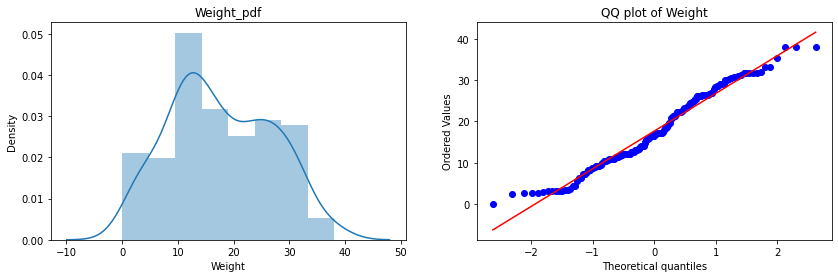

In [197]:
#lets check 

plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(y)
plt.title("Weight_pdf")

plt.subplot(122)
stats.probplot(y, dist = "norm", plot = plt)
plt.title("QQ plot of Weight")
plt.show()

In [198]:
# splitting the train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [199]:
#checking the shape

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127, 4)
(32, 4)
(127,)
(32,)


In [200]:
# Encoding categorical variables using one hot encoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers = [('tnf1', OneHotEncoder(sparse = False, drop = 'first'), ["Species"])], remainder = 'passthrough')

In [201]:
x_transformed = transformer.fit_transform(X_train)

In [202]:
x_transformed

array([[ 0.    ,  0.    ,  1.    , ..., 64.    ,  9.6   ,  6.144 ],
       [ 0.    ,  0.    ,  1.    , ..., 38.8   ,  5.9364,  4.3844],
       [ 0.    ,  0.    ,  0.    , ..., 38.3   , 14.8604,  5.2854],
       ...,
       [ 1.    ,  0.    ,  0.    , ..., 23.2   ,  9.396 ,  3.4104],
       [ 0.    ,  1.    ,  0.    , ..., 41.4   , 11.1366,  6.003 ],
       [ 0.    ,  0.    ,  0.    , ..., 25.    ,  6.4   ,  3.8   ]])

In [203]:
x_test_transformed = transformer.transform(X_test)

In [204]:
x_test_transformed

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , 35.    ,
        12.67  ,  4.69  ],
       [ 0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    , 22.8   ,
         6.4752,  3.3516],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    , 25.    ,
         6.275 ,  3.725 ],
       [ 0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    , 25.3   ,
         7.0334,  3.8203],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    , 36.5   ,
        10.2565,  6.3875],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    , 42.5   ,
        11.73  ,  7.225 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    , 39.6   ,
        11.7612,  6.5736],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    , 39.8   ,
         6.2884,  4.0198],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , 45.9   ,
        18.6354,  6.7473],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    , 22.5   ,
         5.9175,  3.3075],
       [ 0.    ,  0.

In [205]:
x_train_new = pd.DataFrame(x_transformed)
x_test_new = pd.DataFrame(x_test_transformed)


In [206]:
x_train_new

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,0.0,0.0,64.0,9.6000,6.1440
1,0.0,0.0,1.0,0.0,0.0,0.0,38.8,5.9364,4.3844
2,0.0,0.0,0.0,0.0,0.0,0.0,38.3,14.8604,5.2854
3,0.0,1.0,0.0,0.0,0.0,0.0,25.5,7.2930,3.7230
4,0.0,1.0,0.0,0.0,0.0,0.0,30.1,7.5852,4.6354
...,...,...,...,...,...,...,...,...,...
122,0.0,0.0,0.0,0.0,0.0,0.0,36.2,14.2266,4.9594
123,0.0,1.0,0.0,0.0,0.0,0.0,28.9,7.1672,4.3350
124,1.0,0.0,0.0,0.0,0.0,0.0,23.2,9.3960,3.4104
125,0.0,1.0,0.0,0.0,0.0,0.0,41.4,11.1366,6.0030


In [207]:
x_test_new

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,12.6700,4.6900
1,0.0,0.0,0.0,1.0,0.0,0.0,22.8,6.4752,3.3516
2,0.0,1.0,0.0,0.0,0.0,0.0,25.0,6.2750,3.7250
3,0.0,0.0,0.0,1.0,0.0,0.0,25.3,7.0334,3.8203
4,0.0,1.0,0.0,0.0,0.0,0.0,36.5,10.2565,6.3875
5,0.0,1.0,0.0,0.0,0.0,0.0,42.5,11.7300,7.2250
6,0.0,0.0,0.0,0.0,0.0,1.0,39.6,11.7612,6.5736
7,0.0,0.0,1.0,0.0,0.0,0.0,39.8,6.2884,4.0198
8,0.0,0.0,0.0,0.0,0.0,0.0,45.9,18.6354,6.7473
9,0.0,1.0,0.0,0.0,0.0,0.0,22.5,5.9175,3.3075


5. **Model Training and Testing**

In [208]:
regressor = LinearRegression()
regressor.fit(x_train_new,y_train)

LinearRegression()

In [209]:
y_prediction = regressor.predict(x_test_new)

In [210]:
y_actual = y_test

In [211]:
y_prediction

array([20.21907681, 10.68633899, 13.05702031, 12.85181993, 24.6750447 ,
       29.60393482, 26.55641704, 18.65396125, 32.21287542, 11.10049883,
       14.97892099, 22.41851785, 28.74651527, 33.03265801,  6.35238736,
        8.72450979, 11.7513648 , 35.05569555, 11.86294479, 27.26593671,
        6.14055195, 21.09916175, 11.83369976, 37.80657332,  8.52537051,
       21.41900381, 26.4969257 , 16.19051456, 29.50247772,  2.83245184,
       24.56170402, 12.15679845])

In [212]:
y_test

7      19.748418
40      0.000000
95     13.038405
45     12.649111
110    23.579652
120    30.000000
59     28.284271
131    17.320508
33     31.224990
83     10.723805
128    14.142136
134    21.354157
60     31.622777
126    31.622777
62      7.745967
37      8.831761
44     12.041595
142    38.013156
85     11.401754
26     26.832816
61      7.416198
54     19.748418
86     10.954451
144    38.013156
63      9.486833
8      21.213203
24     26.457513
56     16.431677
119    29.154759
148     3.114482
19     25.495098
90     10.488088
Name: Weight, dtype: float64

6. **Checking the residuals, r2_score and adjusted_r2**

In [222]:

# r2 score
r2 = r2_score(y_actual, y_prediction)

#adjusted r2 score
c = (1-r2)*(159-1)/(159-4-1)
adjusted_r2 = 1 - c

# cross validation score
cross_validation = np.mean(cross_val_score(regressor, x_train_new, y_train, scoring = 'r2'))

In [224]:
pd.DataFrame([r2,adjusted_r2,cross_validation], index=["r2","adj_r2","cross_val"])

,0
r2,0.951562
adj_r2,0.950303
cross_val,0.985060
